In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from time import time

from tools.common_methods import get_train_test_data, print_results

In [2]:
X_train, X_test, y_train, y_test = get_train_test_data()

In [16]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train_std, y_train)

y_pred = gbr.predict(X_test_std)

print_results(y_test, y_pred)

MSE: 95.50899046748748 	R2 score: 0.9384481398588886


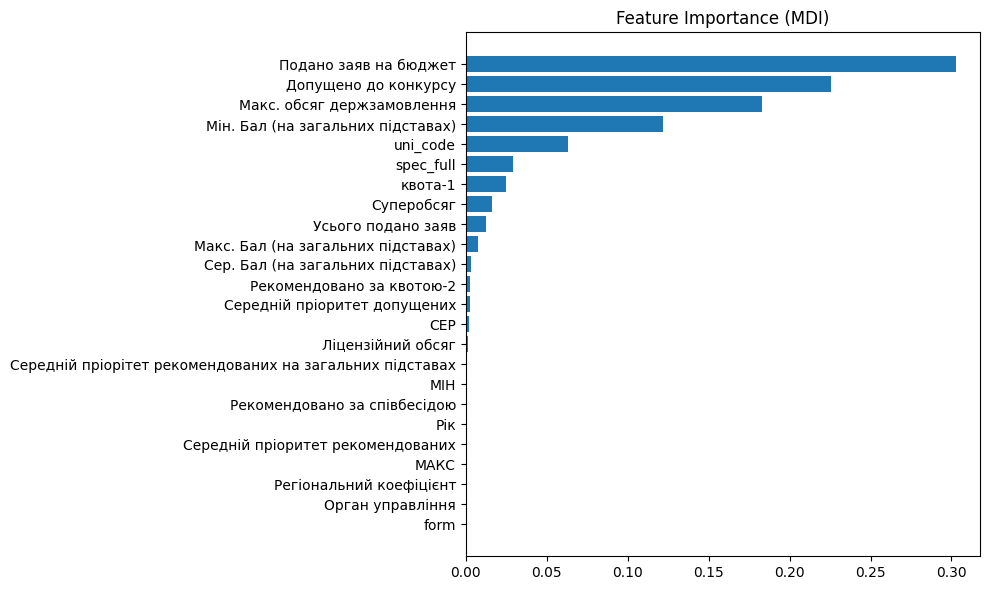

In [17]:
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test_std, y_test, random_state=1, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

In [20]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

gbr = GradientBoostingRegressor(random_state=1, max_depth=10)
gbr.fit(X_train_std, y_train)

y_pred = gbr.predict(X_test_std)

print_results(y_test, y_pred)

MSE: 50.95407487690587 	R2 score: 0.9671620642717329


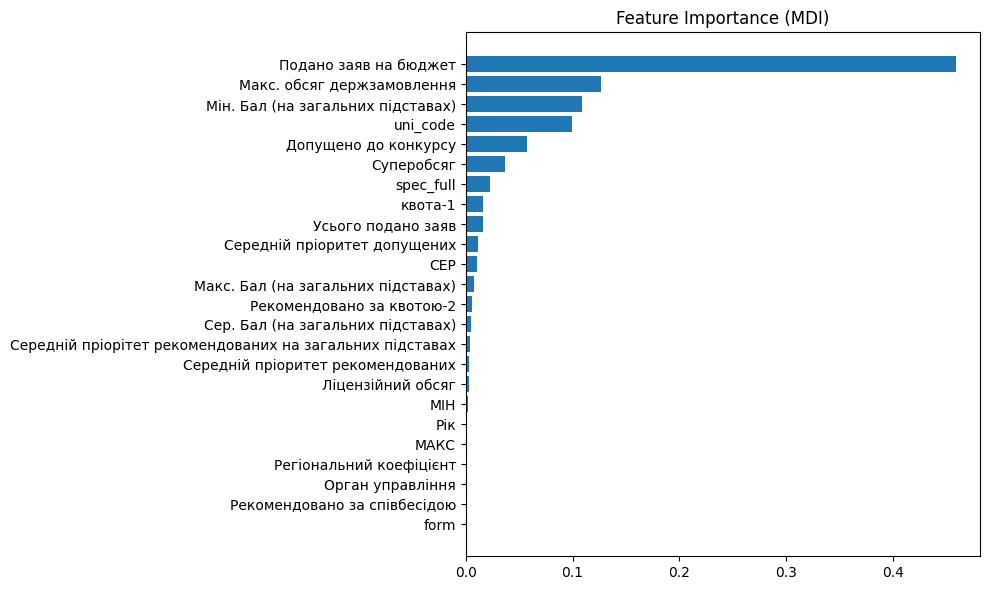

In [21]:
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test_std, y_test, random_state=1, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

In [12]:
gbr_params = {'max_depth': range(5, 30, 3),
              'random_state': [1],
              'n_estimators': range(3, 180, 20),
              'max_features': range(10, 20, 2),
              'learning_rate': [0.1, 0.2, 0.5, 1]
              }

gbr_grid = GridSearchCV(GradientBoostingRegressor(), gbr_params, cv=5, n_jobs=-1, scoring='r2')
start = time()
gbr_grid.fit(X_train_std, y_train)
print('Time:', time() - start)
print(gbr_grid.best_params_)

y_pred = gbr_grid.best_estimator_.predict(X_test_std)
print_results(y_test, y_pred)

Time: 9556.318336248398
{'learning_rate': 0.2, 'max_depth': 5, 'max_features': 12, 'n_estimators': 163, 'random_state': 1}
MSE: 41.76916892101864 	R2 score: 0.9730813818567982


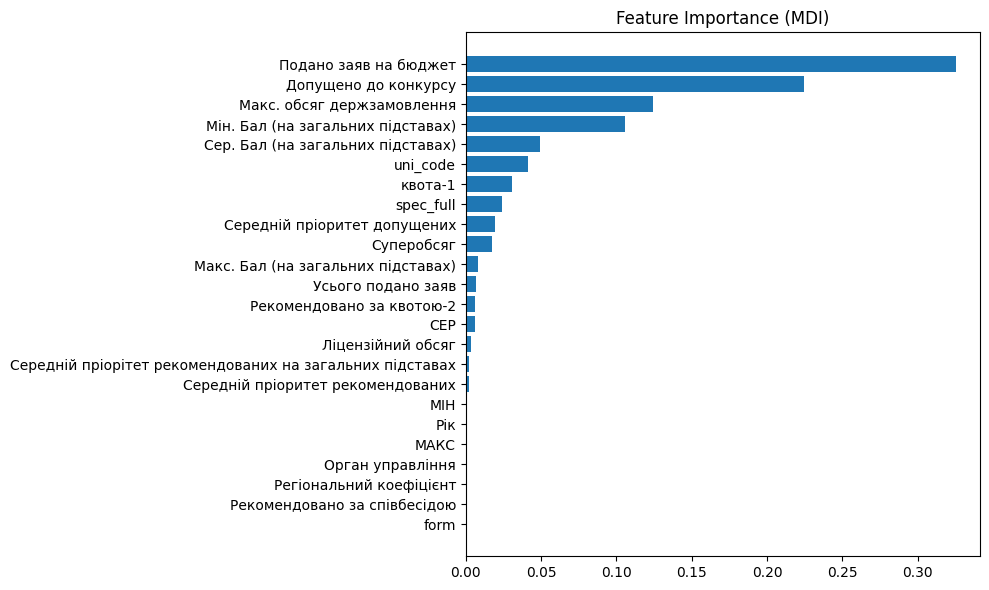

In [15]:
feature_importance = gbr_grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr_grid.best_estimator_, X_test_std, y_test, random_state=1, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()